# MNIST Introduction

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [2]:
tf.set_random_seed(777)

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
# mnist 데이터 download
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [7]:
nb_classes = 10

In [8]:
X = tf.placeholder(tf.float32, [None, 784]) # 28 * 28 = 784
Y = tf.placeholder(tf.float32, [None, nb_classes]) # Output's range : 0 ~ 9

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use `tf.math.argmax` instead


In [10]:
training_epochs = 15 # 전체를 쭉 학습시키는 횟수
batch_size = 100 # 한번에 읽어오는 데이터 갯수
num_iterations = int(mnist.train.num_examples / batch_size) #반복될 횟수

Epoch: 0001, Cost:  2.823611
Epoch: 0002, Cost:  1.061711
Epoch: 0003, Cost:  0.836985
Epoch: 0004, Cost:  0.735045
Epoch: 0005, Cost:  0.669226
Epoch: 0006, Cost:  0.625474
Epoch: 0007, Cost:  0.591106
Epoch: 0008, Cost:  0.563774
Epoch: 0009, Cost:  0.540781
Epoch: 0010, Cost:  0.523207
Epoch: 0011, Cost:  0.505624
Epoch: 0012, Cost:  0.493046
Epoch: 0013, Cost:  0.479804
Epoch: 0014, Cost:  0.469082
Epoch: 0015, Cost:  0.458266
Learning finished
Accuracy:  0.8969
Label:  [4]
Prediction:  [4]


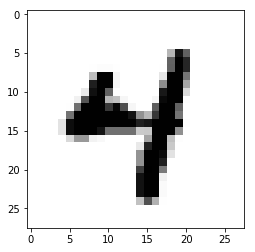

In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
    
        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations
        
        print("Epoch: {:04d}, Cost: {: 9f}".format(epoch + 1, avg_cost))
    print("Learning finished")
    
    print(
        "Accuracy: ",
        accuracy.eval(session = sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )
    
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )
    plt.imshow(mnist.test.images[r : r + 1].reshape(28, 28),
              cmap="Greys",
              interpolation = "nearest")
    plt.show()